In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Seeds dataset (UCI ML Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df = pd.read_csv(url, sep='\s+', header=None)
df.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'label']

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BLAZE\AppData\Local\Temp\ipykernel_5876\3785458475.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep='\s+', header=None)


In [3]:
# Ignore label for clustering and standardize features
X = df.drop('label', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply K-Means (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
preds = kmeans.fit_predict(X_scaled)

C:\Users\BLAZE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# Add 'cluster' column
df['cluster'] = preds

In [6]:
# Print output for first 25 rows
print(df[['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'label', 'cluster']].head(25))

     area  perimeter  compactness  length  width  asymmetry  groove  label  \
0   15.26      14.84       0.8710   5.763  3.312     2.2210   5.220      1   
1   14.88      14.57       0.8811   5.554  3.333     1.0180   4.956      1   
2   14.29      14.09       0.9050   5.291  3.337     2.6990   4.825      1   
3   13.84      13.94       0.8955   5.324  3.379     2.2590   4.805      1   
4   16.14      14.99       0.9034   5.658  3.562     1.3550   5.175      1   
5   14.38      14.21       0.8951   5.386  3.312     2.4620   4.956      1   
6   14.69      14.49       0.8799   5.563  3.259     3.5860   5.219      1   
7   14.11      14.10       0.8911   5.420  3.302     2.7000   5.000      1   
8   16.63      15.46       0.8747   6.053  3.465     2.0400   5.877      1   
9   16.44      15.25       0.8880   5.884  3.505     1.9690   5.533      1   
10  15.26      14.85       0.8696   5.714  3.242     4.5430   5.314      1   
11  14.03      14.16       0.8796   5.438  3.201     1.7170   5.

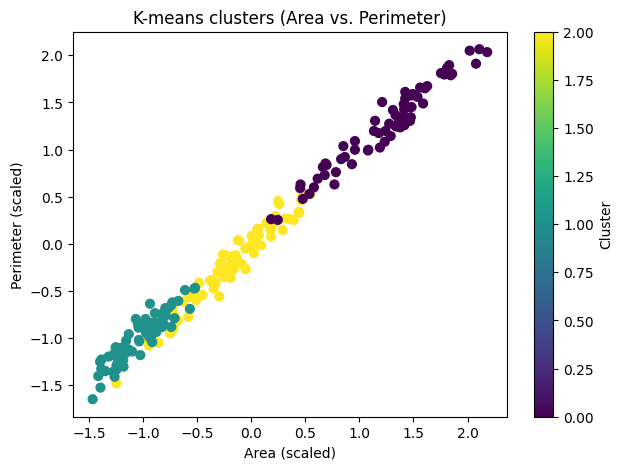

In [9]:
# 1. Scatter plot of first two features colored by cluster
plt.figure(figsize=(7, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=preds, cmap='viridis', s=40)
plt.xlabel('Area (scaled)')
plt.ylabel('Perimeter (scaled)')
plt.title('K-means clusters (Area vs. Perimeter)')
plt.colorbar(label='Cluster')
plt.show()

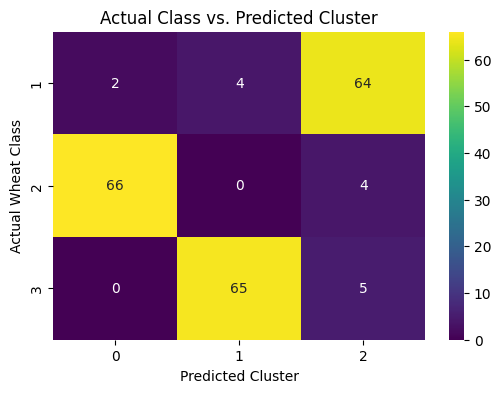

In [10]:
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df['label'], df['cluster']), annot=True, fmt="d", cmap='viridis')
plt.title('Actual Class vs. Predicted Cluster')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Wheat Class')
plt.show()